# Diamonds_XGboost_CV_AllKnown_BalancedData_Metrics_Top5Craton
By Vivian Zeng       01/12/2021

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, r2_score, make_scorer, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

import pickle

In [2]:
ls

20201216.Rmd
20201216金刚石数据库.xlsx
20201217_warpup.docx
20201217_warpup.pdf
Construct Covariance Matrix-Standardization.ipynb
Construct Covariance Matrix.ipynb
Diamind9000MissingIDs_XZ_20201216.csv
Diamind_XZ_20201215_AllKnown.csv
Diamind_XZ_20201216_Unknown.csv
Diamonds_XGboost_CV_AllKnown_20201216.ipynb
Diamonds_XGboost_CV_AllKnown_BalancedData.ipynb
Diamonds_XGboost_CV_AllKnown_BalancedData_Classification_Metric_Top5_Craton.ipynb
diamond20201216.csv


In [3]:
df_raw = pd.read_csv("Diamind_XZ_20201215_AllKnown.csv")
df_raw.head()

,Unnamed: 0,craton,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace,NAs
0,1,Amazonia,0.000000,30.353616,0.008470,0.027368,0.0,0.363968,0.270,0.017143,0.0,0.0,0.023741,0.0,0.026553,37.022328,0.0,0.037718,0.0,0.0,136.0,79.0,31.0,0.2,0.300,27.4,335.0,4.00,0.600,2.100,0.60,0.192,0.0760,0.1472,0.224,0.1000,NaN,NaN,NaN,55.640,2706.0,NaN,48
1,2,Amazonia,0.014000,32.007960,0.047646,0.027368,0.0,0.394944,0.342,0.028572,0.0,0.0,0.023741,0.0,0.033192,33.281206,0.0,0.094296,0.0,0.0,260.0,56.0,181.0,0.4,0.800,56.6,227.0,3.20,0.700,2.400,2.50,0.312,0.1112,0.1288,0.392,0.3280,NaN,NaN,NaN,97.424,3251.0,NaN,48
2,3,Amazonia,0.070000,0.689310,1.138210,2.155230,0.0,0.201344,29.868,0.017143,0.0,0.0,0.023741,0.0,0.026553,36.368993,0.0,0.809374,0.0,0.0,4172.0,429.0,6375.0,1.6,0.144,25.2,4.8,0.56,0.096,0.056,0.32,0.400,0.1600,0.3200,0.640,0.3200,NaN,NaN,NaN,156.800,1887.0,NaN,48
3,4,Amazonia,0.004667,30.101868,0.008470,0.027368,0.0,0.565312,0.072,0.021429,0.0,0.0,0.023741,0.0,0.026553,35.941214,0.0,0.037718,0.0,0.0,2944.0,155.0,790.0,0.2,0.300,348.7,646.0,2.30,0.500,1.900,0.70,0.300,0.0688,0.1864,0.248,0.1544,NaN,NaN,NaN,71.488,2397.0,NaN,48
4,5,Amazonia,0.028000,32.463504,0.068822,0.027368,0.0,0.325248,0.300,0.017143,0.0,0.0,0.023741,0.0,0.026553,31.290089,0.0,0.055006,0.0,0.0,153.0,53.0,13.0,0.3,0.500,68.7,205.0,8.80,0.800,2.900,0.70,0.100,0.0000,0.1000,0.256,0.5000,NaN,NaN,NaN,67.304,2898.0,NaN,48


### Data Preprocessing

In [6]:
df = df_raw.copy()
df.shape

(2144, 43)

In [7]:
df.columns #Keep NA to see NA's impact

Index(['Unnamed: 0', 'craton', 'Si', 'Ti', 'Al', 'Cr', 'V', 'Mn', 'Mg', 'Ca',
       'Sr', 'Ba', 'Na', 'P', 'K', 'Fe', 'Co', 'Ni', 'S', 'Zn', 'Cr_trace',
       'Co_trace', 'Ni_trace', 'Sr_trace', 'Y_trace', 'Zr_trace', 'Nb_trace',
       'Ba_trace', 'La_trace', 'Ce_trace', 'Nd_trace', 'Sm_trace', 'Eu_trace',
       'Dy_trace', 'Er_trace', 'Yb_trace', 'Ti_trace', 'Fe_trace', 'Al_trace',
       'Ca_trace', 'Mn_trace', 'Mg_trace', 'NAs'],
      dtype='object')

In [8]:
df.drop(df.columns[df.isna().mean() == 1], axis=1, inplace=True)  # Remove columns that 100% missing 
df.shape

(2144, 43)

In [10]:
df=df.drop(df.columns[0], axis=1)

In [11]:
df=df.drop('NAs', axis=1)

In [12]:
df.head()

,craton,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace
0,Amazonia,0.000000,30.353616,0.008470,0.027368,0.0,0.363968,0.270,0.017143,0.0,0.0,0.023741,0.0,0.026553,37.022328,0.0,0.037718,0.0,0.0,136.0,79.0,31.0,0.2,0.300,27.4,335.0,4.00,0.600,2.100,0.60,0.192,0.0760,0.1472,0.224,0.1000,NaN,NaN,NaN,55.640,2706.0,NaN
1,Amazonia,0.014000,32.007960,0.047646,0.027368,0.0,0.394944,0.342,0.028572,0.0,0.0,0.023741,0.0,0.033192,33.281206,0.0,0.094296,0.0,0.0,260.0,56.0,181.0,0.4,0.800,56.6,227.0,3.20,0.700,2.400,2.50,0.312,0.1112,0.1288,0.392,0.3280,NaN,NaN,NaN,97.424,3251.0,NaN
2,Amazonia,0.070000,0.689310,1.138210,2.155230,0.0,0.201344,29.868,0.017143,0.0,0.0,0.023741,0.0,0.026553,36.368993,0.0,0.809374,0.0,0.0,4172.0,429.0,6375.0,1.6,0.144,25.2,4.8,0.56,0.096,0.056,0.32,0.400,0.1600,0.3200,0.640,0.3200,NaN,NaN,NaN,156.800,1887.0,NaN
3,Amazonia,0.004667,30.101868,0.008470,0.027368,0.0,0.565312,0.072,0.021429,0.0,0.0,0.023741,0.0,0.026553,35.941214,0.0,0.037718,0.0,0.0,2944.0,155.0,790.0,0.2,0.300,348.7,646.0,2.30,0.500,1.900,0.70,0.300,0.0688,0.1864,0.248,0.1544,NaN,NaN,NaN,71.488,2397.0,NaN
4,Amazonia,0.028000,32.463504,0.068822,0.027368,0.0,0.325248,0.300,0.017143,0.0,0.0,0.023741,0.0,0.026553,31.290089,0.0,0.055006,0.0,0.0,153.0,53.0,13.0,0.3,0.500,68.7,205.0,8.80,0.800,2.900,0.70,0.100,0.0000,0.1000,0.256,0.5000,NaN,NaN,NaN,67.304,2898.0,NaN


In [13]:
df.craton.value_counts()

Siberia                 695
Kaapvaal                410
Slave                   330
Amazonia                207
Congo                   101
West Africa              98
Superior                 86
Guyana                   57
Alluvial                 38
Wyoming                  35
Zimbabwe                 28
Gawler                   17
Tarim                    12
East European            10
Pohorje                  10
Buffalo Head Terrane      6
Kalahari                  4
Name: craton, dtype: int64

In [14]:
df.craton.nunique()

17

In [16]:
df_top5= df[df.craton.isin(['Siberia','Kaapvaal','Slave','Amazonia', 'Congo'])]

In [18]:
df_top5.shape

(1743, 41)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

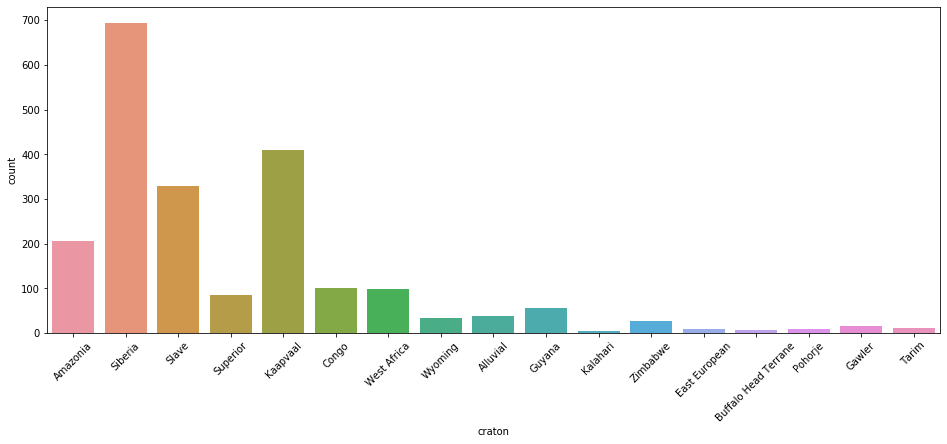

In [27]:
plt.figure(figsize=(16, 6))
sns.countplot(df.craton)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

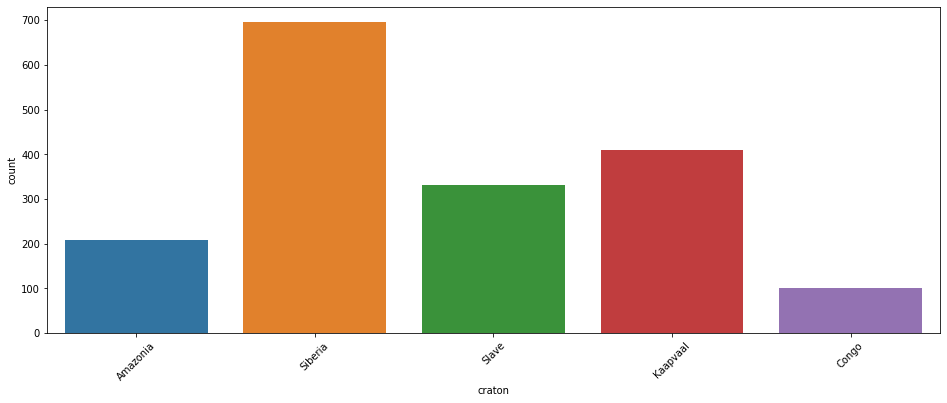

In [20]:
plt.figure(figsize=(16, 6))
sns.countplot(df_top5.craton)
plt.xticks(rotation=45)

In [23]:
#df.craton = le.fit_transform(df.craton.astype(str))
df_top5.craton=df_top5.craton.astype('category')

In [25]:
df_top5.craton.value_counts()

Siberia     695
Kaapvaal    410
Slave       330
Amazonia    207
Congo       101
Name: craton, dtype: int64

In [28]:
df_top5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1743 entries, 0 to 2143
Data columns (total 41 columns):
craton      1743 non-null category
Si          1582 non-null float64
Ti          1582 non-null float64
Al          1582 non-null float64
Cr          1582 non-null float64
V           1464 non-null float64
Mn          1575 non-null float64
Mg          1581 non-null float64
Ca          1582 non-null float64
Sr          1449 non-null float64
Ba          1456 non-null float64
Na          1576 non-null float64
P           1526 non-null float64
K           1581 non-null float64
Fe          1582 non-null float64
Co          1449 non-null float64
Ni          1552 non-null float64
S           1449 non-null float64
Zn          1449 non-null float64
Cr_trace    611 non-null float64
Co_trace    575 non-null float64
Ni_trace    686 non-null float64
Sr_trace    419 non-null float64
Y_trace     293 non-null float64
Zr_trace    344 non-null float64
Nb_trace    317 non-null float64
Ba_trace    361

Missing Value proportions

In [108]:
df.isnull().sum().sum() /(df.shape[0]* df.shape[1])

0.4580110120131052

In [109]:
df_top5.isnull().sum().sum() /(df_top5.shape[0]* df_top5.shape[1])

0.44439780026027453

### Split data into craton and elements

In [29]:
cratons = df_top5.craton.values
cratons=cratons.astype('str')
cratons

array(['Amazonia', 'Amazonia', 'Amazonia', ..., 'Siberia', 'Siberia',
       'Siberia'], dtype='<U8')

In [30]:
le = LabelEncoder()
cratons = le.fit_transform(cratons)
cratons

array([0, 0, 0, ..., 3, 3, 3])

In [31]:
features = df_top5.drop(['craton'], axis=1)
features.shape

(1743, 40)

In [32]:
features.head()

,Si,Ti,Al,Cr,V,Mn,Mg,Ca,Sr,Ba,Na,P,K,Fe,Co,Ni,S,Zn,Cr_trace,Co_trace,Ni_trace,Sr_trace,Y_trace,Zr_trace,Nb_trace,Ba_trace,La_trace,Ce_trace,Nd_trace,Sm_trace,Eu_trace,Dy_trace,Er_trace,Yb_trace,Ti_trace,Fe_trace,Al_trace,Ca_trace,Mn_trace,Mg_trace
0,0.000000,30.353616,0.008470,0.027368,0.0,0.363968,0.270,0.017143,0.0,0.0,0.023741,0.0,0.026553,37.022328,0.0,0.037718,0.0,0.0,136.0,79.0,31.0,0.2,0.300,27.4,335.0,4.00,0.600,2.100,0.60,0.192,0.0760,0.1472,0.224,0.1000,NaN,NaN,NaN,55.640,2706.0,NaN
1,0.014000,32.007960,0.047646,0.027368,0.0,0.394944,0.342,0.028572,0.0,0.0,0.023741,0.0,0.033192,33.281206,0.0,0.094296,0.0,0.0,260.0,56.0,181.0,0.4,0.800,56.6,227.0,3.20,0.700,2.400,2.50,0.312,0.1112,0.1288,0.392,0.3280,NaN,NaN,NaN,97.424,3251.0,NaN
2,0.070000,0.689310,1.138210,2.155230,0.0,0.201344,29.868,0.017143,0.0,0.0,0.023741,0.0,0.026553,36.368993,0.0,0.809374,0.0,0.0,4172.0,429.0,6375.0,1.6,0.144,25.2,4.8,0.56,0.096,0.056,0.32,0.400,0.1600,0.3200,0.640,0.3200,NaN,NaN,NaN,156.800,1887.0,NaN
3,0.004667,30.101868,0.008470,0.027368,0.0,0.565312,0.072,0.021429,0.0,0.0,0.023741,0.0,0.026553,35.941214,0.0,0.037718,0.0,0.0,2944.0,155.0,790.0,0.2,0.300,348.7,646.0,2.30,0.500,1.900,0.70,0.300,0.0688,0.1864,0.248,0.1544,NaN,NaN,NaN,71.488,2397.0,NaN
4,0.028000,32.463504,0.068822,0.027368,0.0,0.325248,0.300,0.017143,0.0,0.0,0.023741,0.0,0.026553,31.290089,0.0,0.055006,0.0,0.0,153.0,53.0,13.0,0.3,0.500,68.7,205.0,8.80,0.800,2.900,0.70,0.100,0.0000,0.1000,0.256,0.5000,NaN,NaN,NaN,67.304,2898.0,NaN


In [33]:
features.columns

Index(['Si', 'Ti', 'Al', 'Cr', 'V', 'Mn', 'Mg', 'Ca', 'Sr', 'Ba', 'Na', 'P',
       'K', 'Fe', 'Co', 'Ni', 'S', 'Zn', 'Cr_trace', 'Co_trace', 'Ni_trace',
       'Sr_trace', 'Y_trace', 'Zr_trace', 'Nb_trace', 'Ba_trace', 'La_trace',
       'Ce_trace', 'Nd_trace', 'Sm_trace', 'Eu_trace', 'Dy_trace', 'Er_trace',
       'Yb_trace', 'Ti_trace', 'Fe_trace', 'Al_trace', 'Ca_trace', 'Mn_trace',
       'Mg_trace'],
      dtype='object')

In [34]:
def plot_importance(feature_df, model, n_feature):
    '''
    Input:
        feature_df: The feature dataframe / The X_train with column names
        model: The training model
        n_feature: number of feature importance you want to display
    Output:
        A plot with the top n feature importance in decreasing order
    '''
    vals = model.feature_importances_
    df = pd.DataFrame(vals, index=feature_df.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
    df_n = df.iloc[:n_feature,]
    plt.figure(figsize=(16, 9))
    plt.bar(df_n.index, df_n.Importance)
    plt.xticks(rotation=45)

In [35]:
def get_metrics(mod, X_train, X_test, y_train, y_test):
    """ Returns a data frame of metrics (precision,
        recall, AUC ROC) from training and test sets.
        Assumes model has decision_function() method.
        This will at least work for SVC, LDA, QDA.
    """
    pred_train = mod.predict(X_train)
    pred_test = mod.predict(X_test)
    recall_train = recall_score(y_train, pred_train,average='weighted')
    recall_test = recall_score(y_test, pred_test, average='weighted')
    precision_train = precision_score(y_train, pred_train, average='weighted')
    precision_test = precision_score(y_test, pred_test, average='weighted')
    #rocauc_train = roc_auc_score(y_train, pred_train, average='weighted', multi_class='ovr')
    #rocauc_test = roc_auc_score(y_test, pred_test,average='weighted',multi_class='ovr')
    metrics = {'Set':['Train', 'Test'],
               'Recall':[recall_train, recall_test],
               'Precision':[precision_train, precision_test],
               #'ROC AUC':[rocauc_train, rocauc_test]}
              }
    return pd.DataFrame(metrics)

### Split into training set and test set

In [36]:
X_train, X_test, y_train, y_test = train_test_split(features, cratons, test_size=0.2, 
                                                    stratify = cratons, random_state = 2020)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1394, 40), (349, 40), (1394,), (349,))

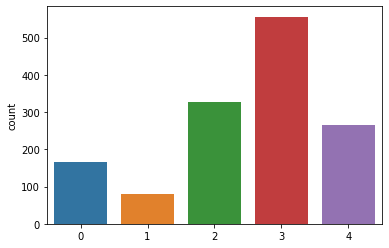

In [37]:
sns.countplot(y_train)

In [38]:
from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight('balanced',
                                             np.unique(df['craton']),
                                             df['craton']))

w_array = np.ones(y_train.shape[0], dtype = 'float')
for i, val in enumerate(y_train):
    w_array[i] = class_weights[val-1]

In [39]:
#from sklearn.utils.class_weight import compute_sample_weight
# xgb_classifier.fit(X, y, sample_weight=compute_sample_weight("balanced", y))

### XGBoost

# Base Models

In [40]:
xg = XGBClassifier(random_state=2020)
xg.fit(X_train, y_train)
y_train_preds = xg.predict(X_train)
y_test_preds = xg.predict(X_test)

     Set    Recall  Precision
0  Train  1.000000   1.000000
1   Test  0.974212   0.974161


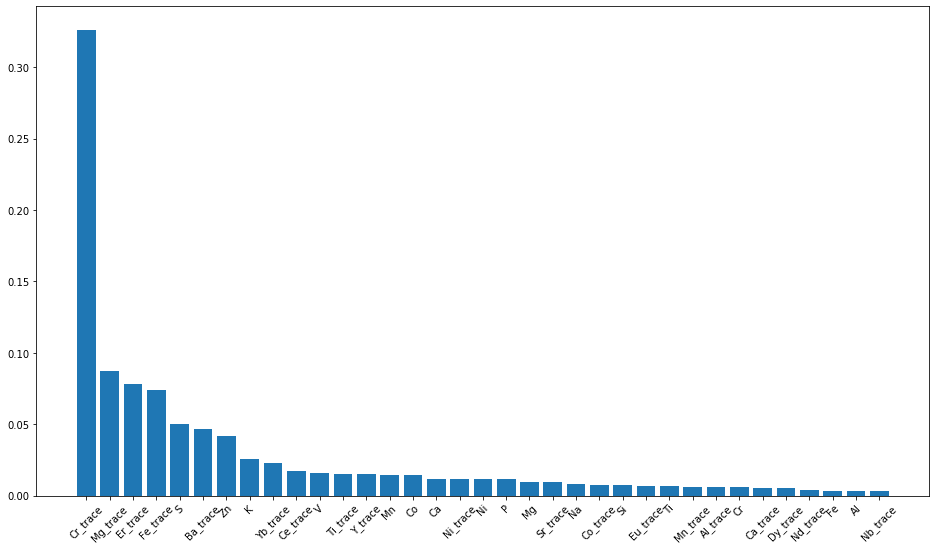

In [48]:
print(get_metrics(xg, X_train, X_test, y_train, y_test))
plot_importance(features, xg, 35)

In [94]:
# xgb = XGBClassifier(subsample=0.5, colsample_bytree=0.1, objective='multi:softmax', num_class = 9, 
#                     eval_metric = 'merror', seed=2020)

In [46]:
xgb = XGBClassifier(objective='multi:softmax', num_class = 5, 
                    eval_metric = 'merror', seed=2021)
xgb.fit(X_train, y_train)
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

#May not work since got the same scores

In [47]:
get_metrics(xgb, X_train, X_test, y_train, y_test)

,Set,Recall,Precision
0,Train,1.000000,1.000000
1,Test,0.974212,0.974161


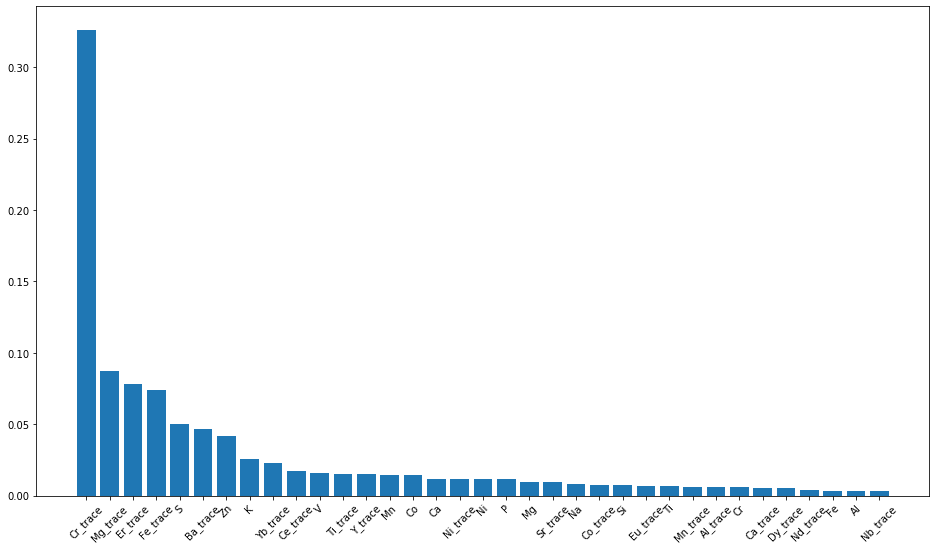

In [49]:
plot_importance(features, xgb, 35)

### Model Optimization

In [50]:
learning_rate = [0.01, 0.05, 0.1, 0.2, 1]
depth = [3, 4, 5, 6, 7]
min_split = [1, 2, 3, 4, 5]

In [51]:
# scorings = {'f1_samples': make_scorer(recall_score, average = 'samples'),
#            'f1_macro': make_scorer(f1_score, average = 'macro'),
#            'f1_weighted': make_scorer(f1_score, average = 'weighted')}

In [52]:
# scorings = {'accuracy': make_scorer(accuracy_score), 
#            'f1_samples': make_scorer(recall_score, average = 'samples'),
#            'f1_macro': make_scorer(f1_score, average = 'macro'),
#            'f1_weighted': make_scorer(f1_score, average = 'weighted')}

In [53]:
xgb = XGBClassifier(objective='multi:softmax', num_class = 5, 
                    eval_metric = 'merror', tree_method='hist', seed=2021)

In [54]:
xgb_cv = GridSearchCV(xgb, param_grid = {'eta': learning_rate, 'gamma': min_split, 'max_depth': depth}, 
                      cv=5, scoring='accuracy')
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='merror', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, num_class=5,
                                     num_parallel_tree=None,
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=None,
           

In [55]:
xgb_cv.best_params_

{'eta': 0.05, 'gamma': 1, 'max_depth': 7}

In [56]:
xgb_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.05,
              eval_metric='merror', gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.0500000007,
              max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_class=5, num_parallel_tree=1, objective='multi:softprob',
              random_state=2021, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, seed=2021, subsample=1, tree_method='hist',
              validate_parameters=1, ...)

In [57]:
xgb_cv.best_score_

0.9519300688481472

In [58]:
xgb_best = xgb_cv.best_estimator_

In [59]:
y_train_preds = xgb_best.predict(X_train)
y_test_preds = xgb_best.predict(X_test)

In [61]:
print(get_metrics(xgb_best, X_train, X_test, y_train, y_test))

     Set    Recall  Precision
0  Train  0.989957   0.990008
1   Test  0.957020   0.958586


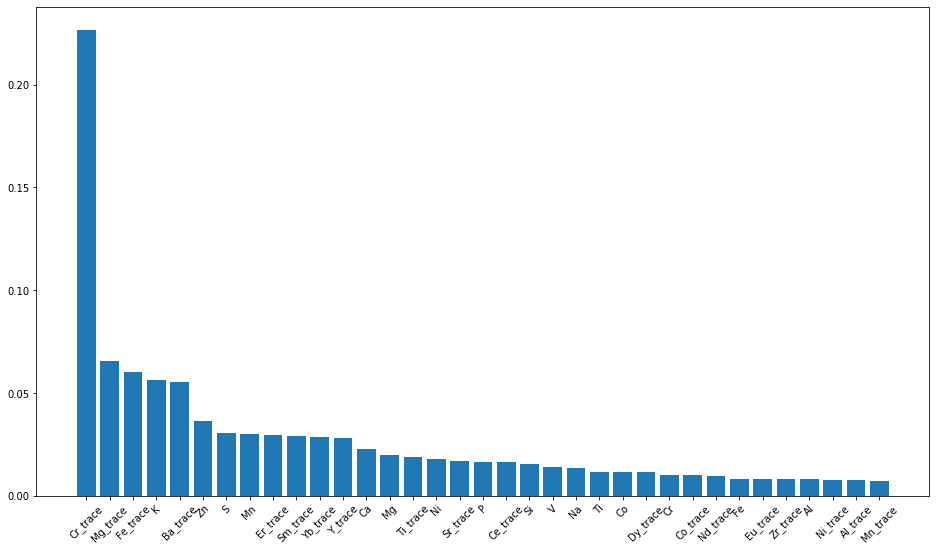

In [62]:
plot_importance(features, xgb_best, 35)

### ============ Save the best model ==================================

In [63]:
xgb_best = XGBClassifier(objective='multi:softmax', num_class = 5, 
                    eval_metric = 'merror', tree_method='hist', 
                    eta = 0.05, gamma = 1, max_depth = 7, seed=2021)
xgb_best.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.05,
              eval_metric='merror', gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.0500000007,
              max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_class=5, num_parallel_tree=1, objective='multi:softprob',
              random_state=2021, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, seed=2021, subsample=1, tree_method='hist',
              validate_parameters=1, ...)

In [64]:
y_train_preds = xgb_best.predict(X_train)
y_test_preds = xgb_best.predict(X_test)

In [65]:
print(get_metrics(xgb_best, X_train, X_test, y_train, y_test))

     Set    Recall  Precision
0  Train  0.989957   0.990008
1   Test  0.957020   0.958586


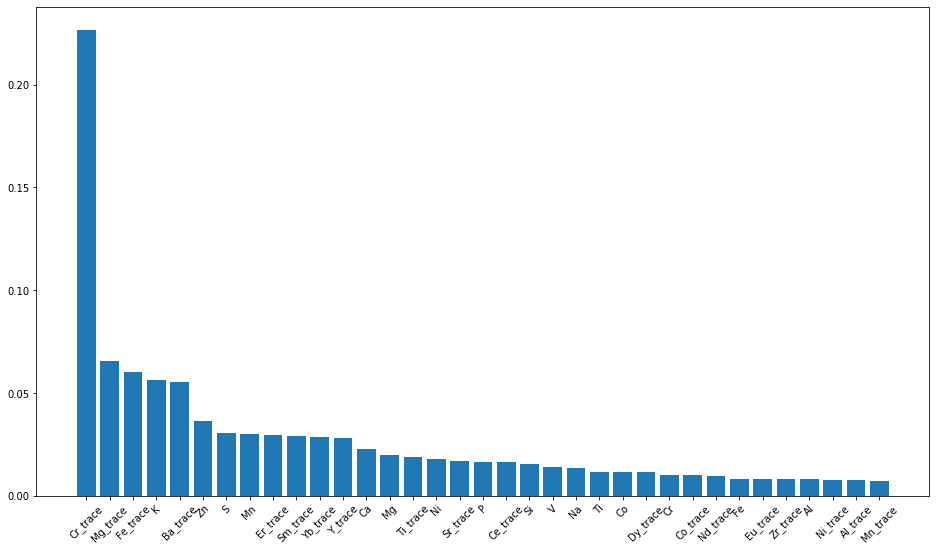

In [66]:
plot_importance(features, xgb_best, 35)

In [67]:
#pip install shap

In [68]:
import shap

In [69]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(xgb_best)
shap_values = explainer.shap_values(X_train)

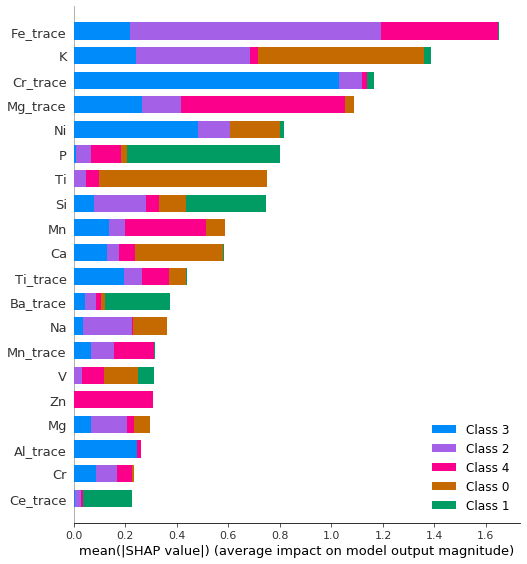

In [70]:
# take the mean absolute value of the SHAP values for 
# each feature to get a standard bar plot (produces stacked bars for multi-class outputs)
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Sampling

In [71]:
from imblearn.over_sampling import RandomOverSampler #
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
pd.options.display.max_columns = None # display all columns

In [72]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority', random_state=2021)

In [73]:
# fit and apply the transform
X_o_train, y_o_train = oversample.fit_resample(X_train, y_train)

In [82]:
# fit and apply the transform
X_o_train, y_o_train = oversample.fit_resample(X_o_train, y_o_train)

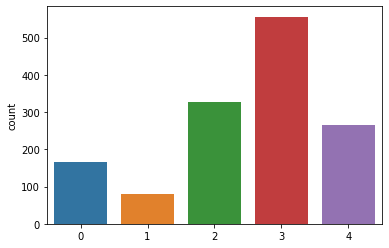

In [83]:
sns.countplot(y_train)

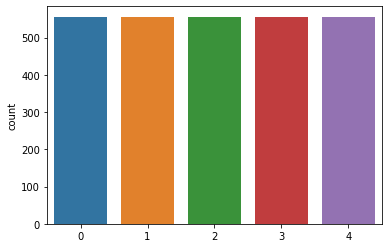

In [84]:
sns.countplot(y_o_train)

In [85]:
# fit and apply the transform 
## X 10 times
X_o_train, y_o_train = oversample.fit_resample(X_o_train, y_o_train)

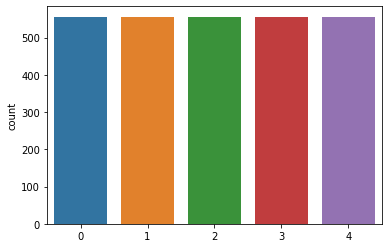

In [86]:
sns.countplot(y_o_train)

In [87]:
balance=pd.merge(pd.DataFrame(y_o_train), pd.DataFrame(X_o_train), left_index=True, right_index=True)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

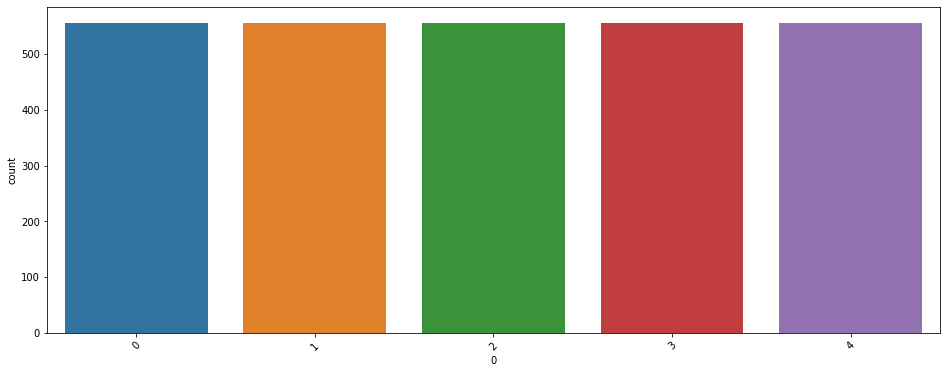

In [88]:
plt.figure(figsize=(16, 6))
sns.countplot(balance.iloc[:, 0])
plt.xticks(rotation=45)

In [89]:
xg_bala = XGBClassifier(random_state=2020)
xg_bala.fit(X_o_train, y_o_train)
y_train_preds = xg_bala.predict(X_o_train)
y_test_preds = xg_bala.predict(X_test)

In [92]:
print(get_metrics(xg_bala, X_o_train, X_test, y_o_train, y_test))

     Set    Recall  Precision
0  Train  1.000000    1.00000
1   Test  0.971347    0.97145


In [93]:
xgb = XGBClassifier(objective='multi:softmax', num_class = 5, 
                    eval_metric = 'merror', tree_method='hist', seed=2020)

In [94]:
xgb_cv = GridSearchCV(xgb, param_grid = {'eta': learning_rate, 'gamma': min_split, 'max_depth': depth}, 
                      cv=5, scoring='accuracy')
xgb_cv.fit(X_o_train, y_o_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='merror', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, num_class=5,
                                     num_parallel_tree=None,
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=None,
           

In [143]:
xgb_cv.best_params_

{'eta': 0.1, 'gamma': 1, 'max_depth': 7}

In [144]:
xgb_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1,
              eval_metric='merror', gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_class=17, num_parallel_tree=1, objective='multi:softprob',
              random_state=2020, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, seed=2020, subsample=1, tree_method='hist',
              validate_parameters=1, ...)

In [95]:
xgb_cv.best_score_

0.9841726618705036

In [96]:
xgb_best = xgb_cv.best_estimator_

In [97]:
y_train_preds = xgb_best.predict(X_o_train)
y_test_preds = xgb_best.predict(X_test)

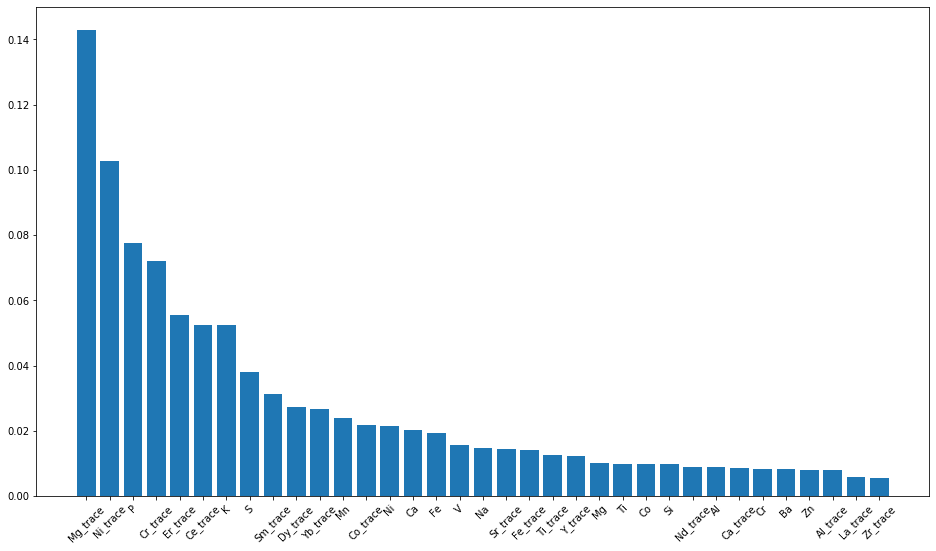

In [98]:
plot_importance(features, xgb_best, 35)

In [99]:
print(get_metrics(xgb_best, X_o_train, X_test, y_o_train, y_test))

     Set    Recall  Precision
0  Train  0.996403   0.996405
1   Test  0.965616   0.966441


In [101]:
xgb_best = XGBClassifier(objective='multi:softmax', num_class = 5, 
                    eval_metric = 'merror', tree_method='hist', 
                    eta = 0.1, gamma = 1, max_depth = 7, seed=2020)
xgb_best.fit(X_o_train, y_o_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1,
              eval_metric='merror', gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_class=5, num_parallel_tree=1, objective='multi:softprob',
              random_state=2020, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, seed=2020, subsample=1, tree_method='hist',
              validate_parameters=1, ...)

In [102]:
print(get_metrics(xgb_best, X_o_train, X_test, y_o_train, y_test))

     Set    Recall  Precision
0  Train  0.997122   0.997144
1   Test  0.968481   0.969506


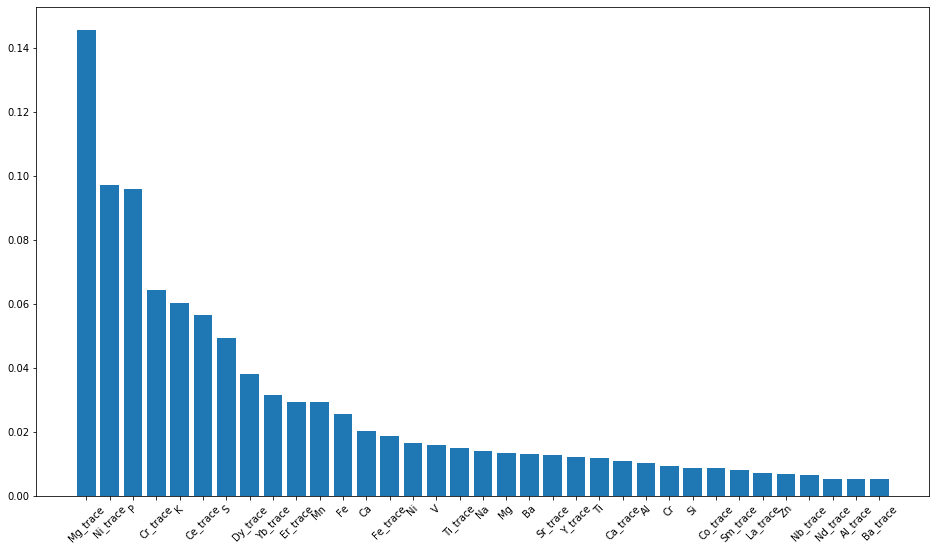

In [103]:
plot_importance(features, xgb_best, 35)

# Sampling Validation